In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

users_cols = ['UserID', 'Gender', 'Age', 'Occupation', 'ZipCode']
ratings_cols = ['UserID', 'MovieID', 'Rating', 'Timestamp']
movies_cols = ['MovieID', 'Title', 'Genres']

try:
    users = pd.read_csv(
        'users.dat', 
        sep='::', 
        header=None, 
        names=users_cols, 
        engine='python',
        encoding='latin-1'
    )
    
    ratings = pd.read_csv(
        'ratings.dat', 
        sep='::', 
        header=None, 
        names=ratings_cols, 
        engine='python',
        encoding='latin-1'
    )
    
    movies = pd.read_csv(
        'movies.dat', 
        sep='::', 
        header=None, 
        names=movies_cols, 
        engine='python',
        encoding='latin-1'
    )
except FileNotFoundError:
    print("Lỗi: Đảm bảo các tệp .dat nằm cùng thư mục với tệp Notebook này.")
except Exception as e:
    print(f"Có lỗi xảy ra: {e}")


In [2]:
print("Giá trị thiếu trong Users:\n", users.isnull().sum())
print("Giá trị thiếu trong Ratings:\n", ratings.isnull().sum())
print("Giá trị thiếu trong Movies:\n", movies.isnull().sum())

Giá trị thiếu trong Users:
 UserID        0
Gender        0
Age           0
Occupation    0
ZipCode       0
dtype: int64
Giá trị thiếu trong Ratings:
 UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64
Giá trị thiếu trong Movies:
 MovieID    0
Title      0
Genres     0
dtype: int64


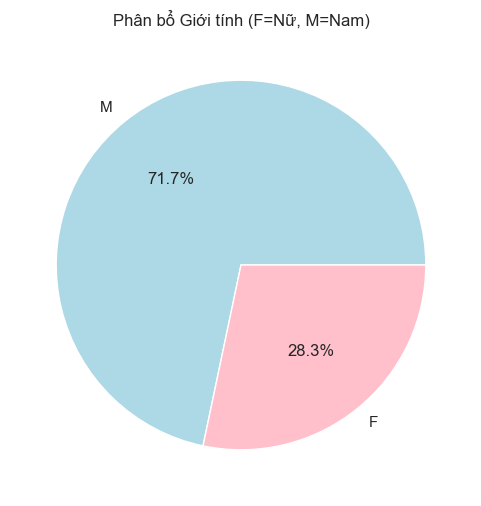

In [3]:
# 1. Biểu đồ Phân bổ giới tính
plt.figure(figsize=(6, 6)) # Đặt kích thước cho biểu đồ
users['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Phân bổ Giới tính (F=Nữ, M=Nam)')
plt.ylabel('') # Ẩn nhãn trục y
plt.show()

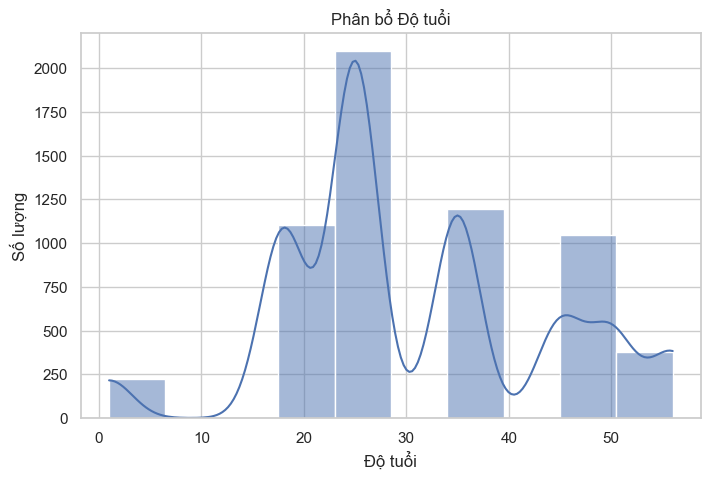

In [4]:
# 2. Biểu đồ Phân bổ độ tuổi
plt.figure(figsize=(8, 5)) # Đặt kích thước
sns.histplot(users['Age'], kde=True, bins=10)
plt.title('Phân bổ Độ tuổi')
plt.xlabel('Độ tuổi')
plt.ylabel('Số lượng')
plt.show()

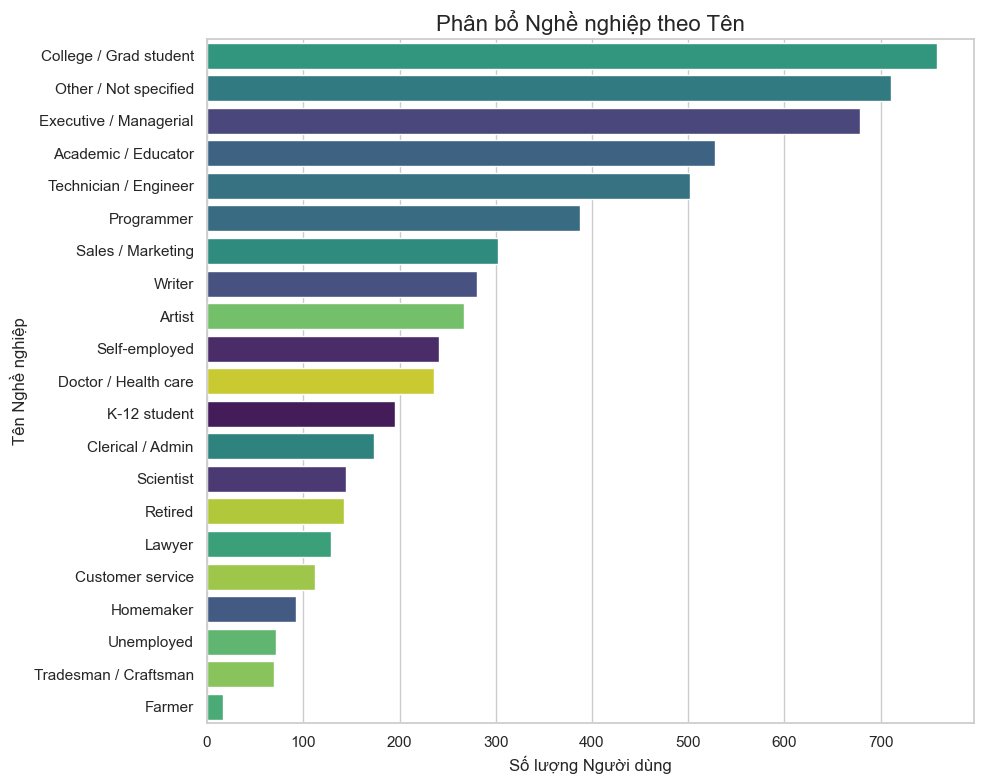

In [23]:
occupation_map = {
    0: "Other / Not specified", 1: "Academic / Educator", 2: "Artist",
    3: "Clerical / Admin", 4: "College / Grad student", 5: "Customer service",
    6: "Doctor / Health care", 7: "Executive / Managerial", 8: "Farmer",
    9: "Homemaker", 10: "K-12 student", 11: "Lawyer", 12: "Programmer",
    13: "Retired", 14: "Sales / Marketing", 15: "Scientist",
    16: "Self-employed", 17: "Technician / Engineer", 18: "Tradesman / Craftsman",
    19: "Unemployed", 20: "Writer"
}
if 'OccupationName' not in users.columns:
    if 'Occupation' in users.columns:
        users['OccupationName'] = users['Occupation'].map(occupation_map).fillna("Other / Not specified")
    else:
        raise KeyError("Không tìm thấy cột 'OccupationName' hoặc 'Occupation' trong DataFrame users.")

plt.figure(figsize=(10, 8))
sns.countplot(
    y='OccupationName',
    data=users,
    order=users['OccupationName'].value_counts().index,
    hue='OccupationName',     
    legend=False,             
    palette='viridis'
)
plt.title('Phân bổ Nghề nghiệp theo Tên', fontsize=16)
plt.xlabel('Số lượng Người dùng', fontsize=12)
plt.ylabel('Tên Nghề nghiệp', fontsize=12)
plt.tight_layout()
plt.show()


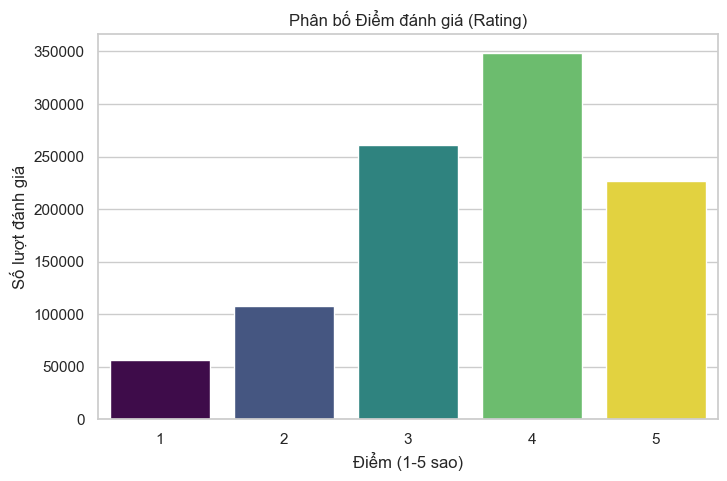

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(
    x='Rating',
    data=ratings,
    hue='Rating',        
    legend=False,         
    palette='viridis'     
)
plt.title('Phân bố Điểm đánh giá (Rating)')
plt.xlabel('Điểm (1-5 sao)')
plt.ylabel('Số lượt đánh giá')
plt.show()


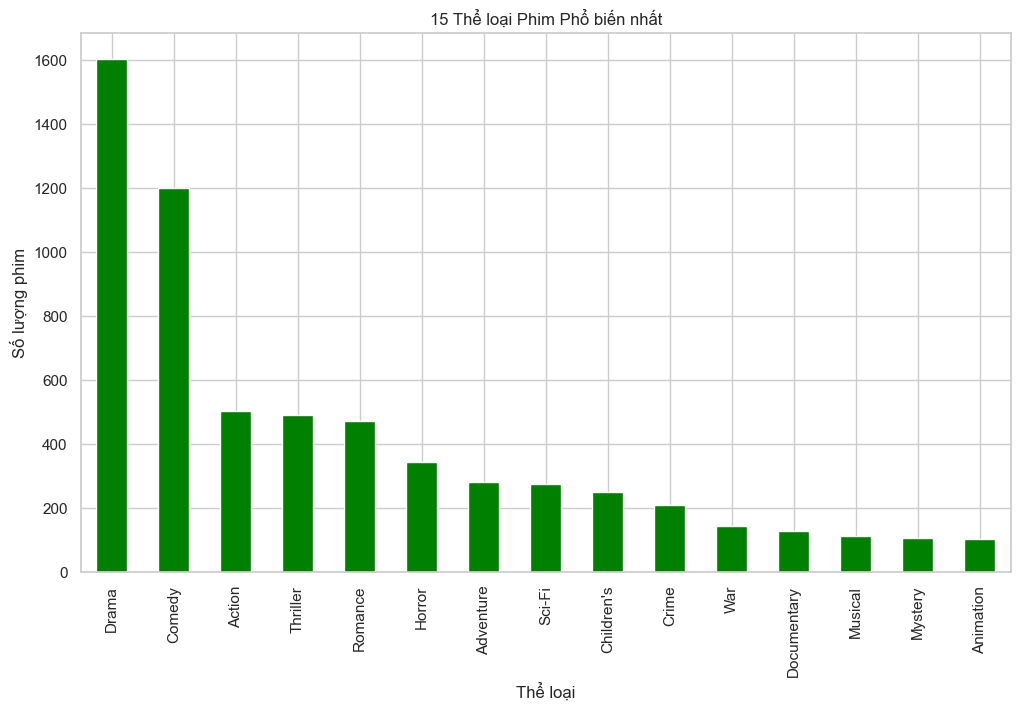

In [7]:
genres_split = movies['Genres'].str.get_dummies('|')
genres_count = genres_split.sum().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
genres_count.head(15).plot(kind='bar', colormap='ocean')
plt.title('15 Thể loại Phim Phổ biến nhất')
plt.xlabel('Thể loại')
plt.ylabel('Số lượng phim')
plt.show()

In [8]:
data = pd.merge(pd.merge(ratings, users), movies)

In [9]:
data

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,ZipCode,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


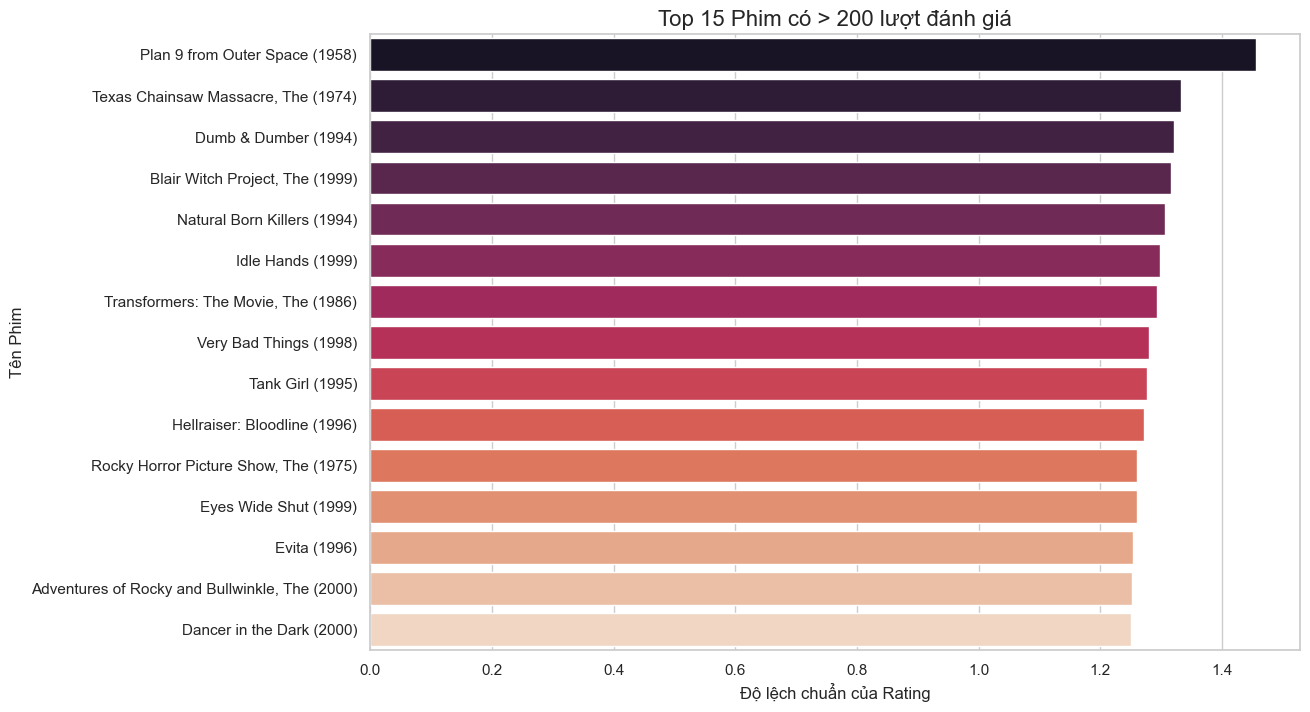

In [10]:
movie_ratings = pd.merge(movies, ratings, on='MovieID')

movie_stats = movie_ratings.groupby('Title').agg(
    rating_count=('Rating', 'count'),
    rating_mean=('Rating', 'mean'),
    rating_std=('Rating', 'std')
).reset_index()

MIN_REVIEWS = 200
popular_controversial = movie_stats[movie_stats['rating_count'] >= MIN_REVIEWS]
popular_controversial = popular_controversial.sort_values('rating_std', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(
    x='rating_std',
    y='Title',
    hue='Title',   
    legend=False,  
    data=popular_controversial.head(15),
    palette='rocket'
)
plt.title(f'Top 15 Phim có > {MIN_REVIEWS} lượt đánh giá', fontsize=16)
plt.xlabel('Độ lệch chuẩn của Rating', fontsize=12)
plt.ylabel('Tên Phim', fontsize=12)
plt.show()


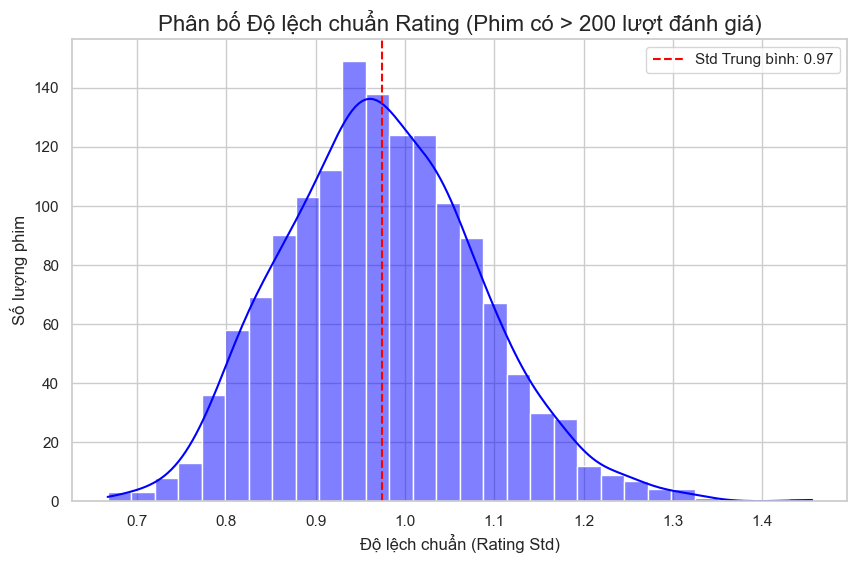

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(popular_controversial['rating_std'], kde=True, bins=30, color='blue')

mean_std = popular_controversial['rating_std'].mean()
plt.axvline(mean_std, color='red', linestyle='--', label=f'Std Trung bình: {mean_std:.2f}')

plt.title(f'Phân bố Độ lệch chuẩn Rating (Phim có > {MIN_REVIEWS} lượt đánh giá)', fontsize=16)
plt.xlabel('Độ lệch chuẩn (Rating Std)', fontsize=12)
plt.ylabel('Số lượng phim', fontsize=12)
plt.legend()
plt.show()

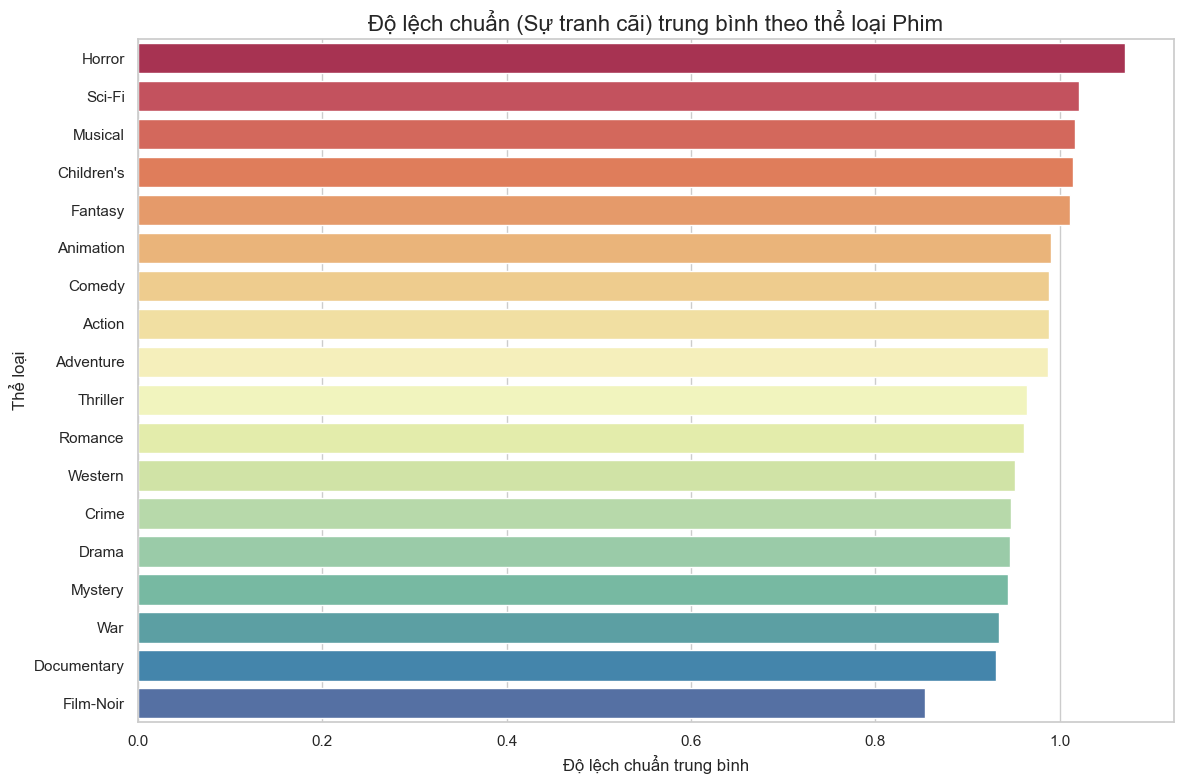

In [12]:
fig, ax1 = plt.subplots(figsize=(12, 8))

genres_std = pd.merge(movie_stats, movies, on='Title')
genres_std_exploded = genres_std.assign(Genre=genres_std['Genres'].str.split('|')).explode('Genre')
genres_std_popular = genres_std_exploded[genres_std_exploded['rating_count'] >= MIN_REVIEWS]

mean_std_by_genre = genres_std_popular.groupby('Genre')['rating_std'].mean().sort_values(ascending=False)
sns.barplot(
    x=mean_std_by_genre.values,
    y=mean_std_by_genre.index,
    hue=mean_std_by_genre.index,  
    legend=False,               
    palette='Spectral',
    ax=ax1
)
ax1.set_title('Độ lệch chuẩn (Sự tranh cãi) trung bình theo thể loại Phim', fontsize=16)
ax1.set_xlabel('Độ lệch chuẩn trung bình', fontsize=12)
ax1.set_ylabel('Thể loại', fontsize=12)
plt.tight_layout()
plt.show()


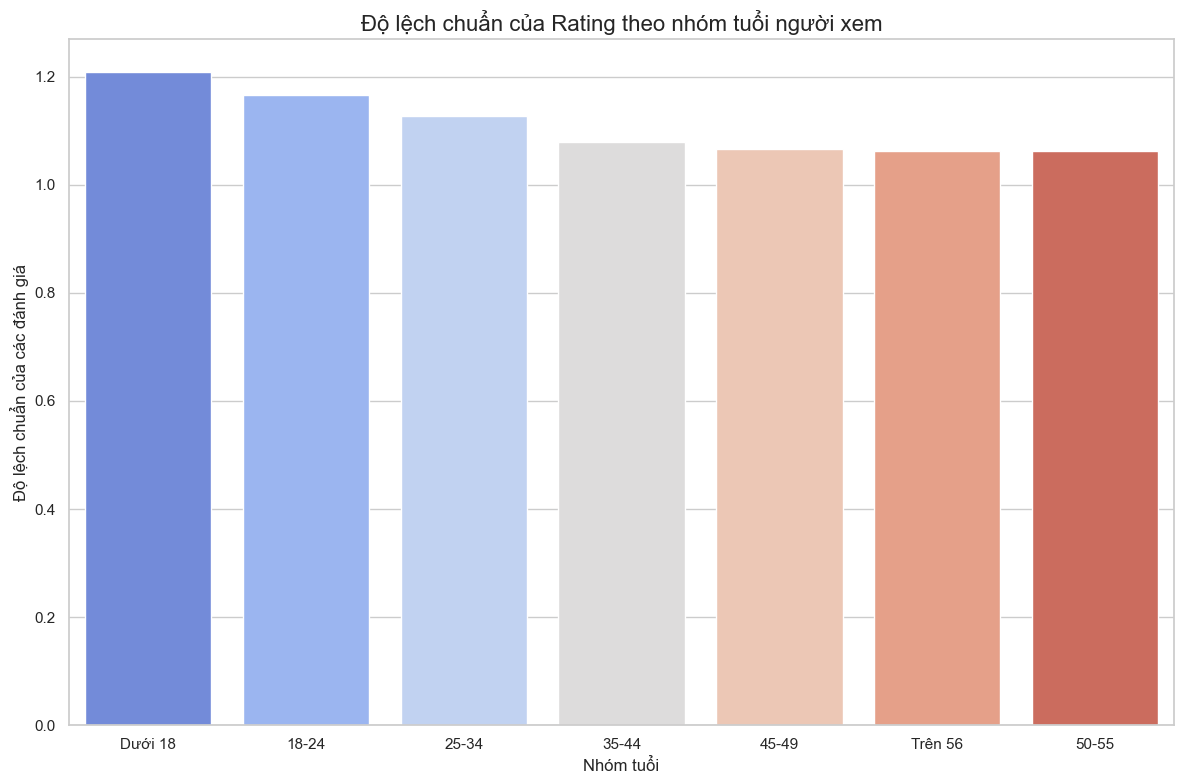

In [13]:
fig, ax2 = plt.subplots(figsize=(12, 8))
ratings_with_age = pd.merge(ratings, users, on='UserID')
age_map = {
    1: "Dưới 18", 18: "18-24", 25: "25-34",
    35: "35-44", 45: "45-49", 50: "50-55", 56: "Trên 56"
}
ratings_with_age['AgeGroup'] = ratings_with_age['Age'].map(age_map)

std_by_age = ratings_with_age.groupby('AgeGroup')['Rating'].std().sort_values(ascending=False)

sns.barplot(
    x=std_by_age.index,
    y=std_by_age.values,
    hue=std_by_age.index,  
    legend=False,
    palette='coolwarm',
    ax=ax2,
    order=std_by_age.index
)
ax2.set_title('Độ lệch chuẩn của Rating theo nhóm tuổi người xem', fontsize=16)
ax2.set_xlabel('Nhóm tuổi', fontsize=12)
ax2.set_ylabel('Độ lệch chuẩn của các đánh giá', fontsize=12)
plt.tight_layout()
plt.show()


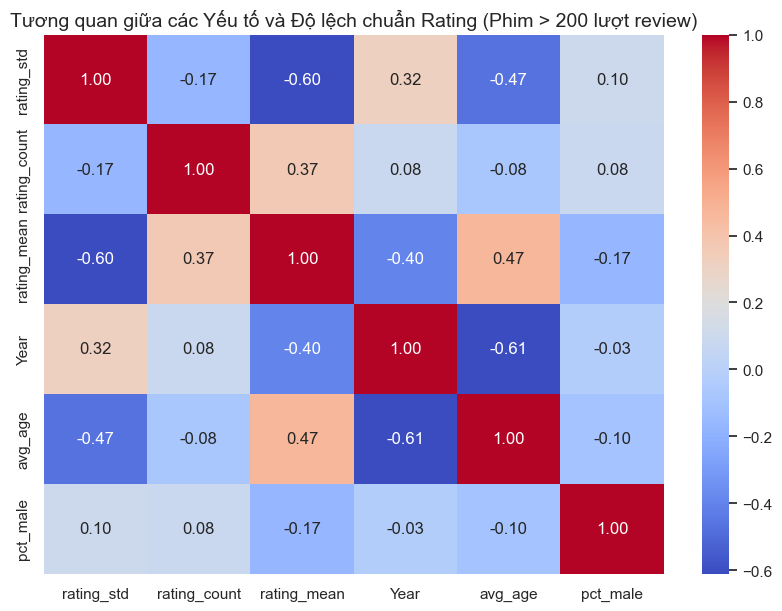

In [14]:
movies_with_year = movies.copy()
movies_with_year['Year'] = movies_with_year['Title'].str.extract(r'\((\d{4})\)$')
movies_with_year = movies_with_year.dropna(subset=['Year'])
movies_with_year['Year'] = pd.to_numeric(movies_with_year['Year'])

analysis_df = pd.merge(movie_stats, movies_with_year[['Title', 'Year']], on='Title')

ratings_with_demos = pd.merge(ratings, users, on='UserID')
full_data_for_demos = pd.merge(ratings_with_demos, movies, on='MovieID')

demo_stats = full_data_for_demos.groupby('Title').agg(
    avg_age = ('Age', 'mean'),           
    pct_male = ('Gender', lambda x: (x == 'M').mean()))

analysis_df = pd.merge(analysis_df, demo_stats, on='Title')
MIN_REVIEWS = 200 
popular_analysis_df = analysis_df[analysis_df['rating_count'] >= MIN_REVIEWS]

factors = [
    'rating_std',     # Mục tiêu (Độ phân tán)
    'rating_count',   # Độ nổi tiếng
    'rating_mean',    # Điểm trung bình
    'Year',           # Năm phát hành
    'avg_age',        # Tuổi trung bình người xem
    'pct_male'        # % Nam giới xem
]

corr_matrix = popular_analysis_df[factors].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title(f'Tương quan giữa các Yếu tố và Độ lệch chuẩn Rating (Phim > {MIN_REVIEWS} lượt review)', fontsize=14)
plt.show()

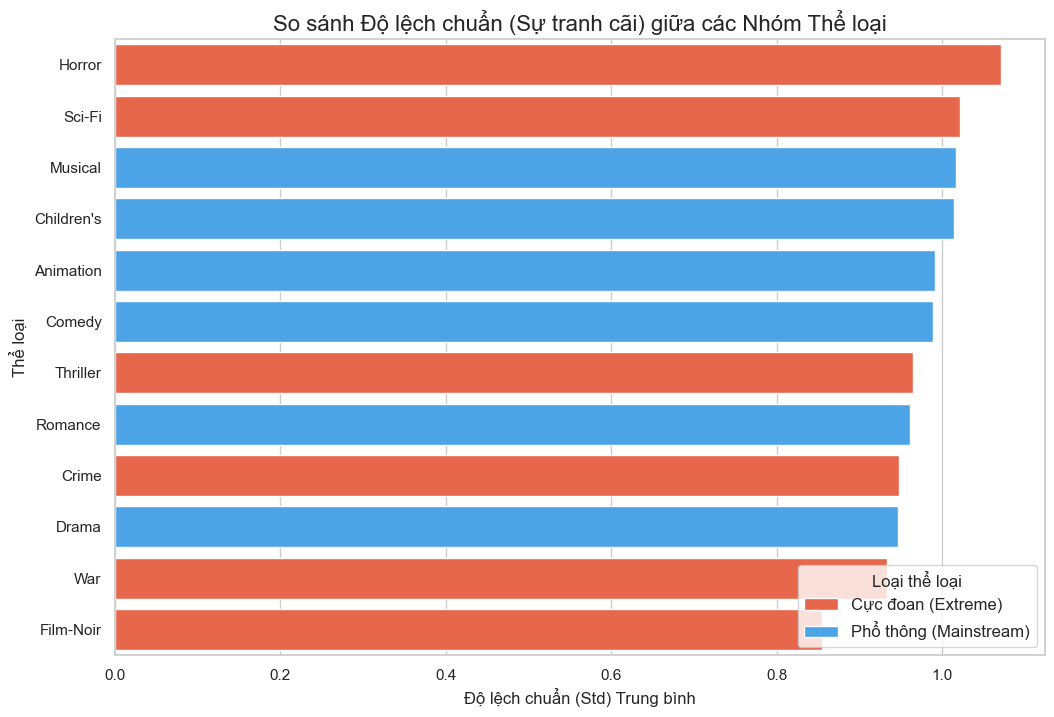

In [15]:
genres_std = pd.merge(movie_stats, movies, on='Title')
genres_std_exploded = genres_std.assign(Genre=genres_std['Genres'].str.split('|')).explode('Genre')
MIN_REVIEWS = 200 
genres_std_popular = genres_std_exploded[genres_std_exploded['rating_count'] >= MIN_REVIEWS]
mean_std_by_genre = genres_std_popular.groupby('Genre')['rating_std'].mean().sort_values(ascending=False)

extreme_genres = ['Horror', 'Sci-Fi', 'Thriller', 'Crime', 'War', 'Film-Noir']
mainstream_genres = ['Comedy', 'Romance', 'Children\'s', 'Animation', 'Drama', 'Musical']

extreme_std = mean_std_by_genre.loc[mean_std_by_genre.index.isin(extreme_genres)]
mainstream_std = mean_std_by_genre.loc[mean_std_by_genre.index.isin(mainstream_genres)]

compare_df = pd.concat([
    extreme_std.reset_index().assign(Type='Cực đoan (Extreme)'),
    mainstream_std.reset_index().assign(Type='Phổ thông (Mainstream)')
]).sort_values('rating_std', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(
    x='rating_std', 
    y='Genre', 
    hue='Type', 
    data=compare_df,
    palette={'Cực đoan (Extreme)':'#FF5733', 'Phổ thông (Mainstream)':'#33A8FF'}
)
plt.title('So sánh Độ lệch chuẩn (Sự tranh cãi) giữa các Nhóm Thể loại', fontsize=16)
plt.xlabel('Độ lệch chuẩn (Std) Trung bình', fontsize=12)
plt.ylabel('Thể loại', fontsize=12)
plt.legend(title='Loại thể loại', loc='lower right', fontsize=12)
plt.show()

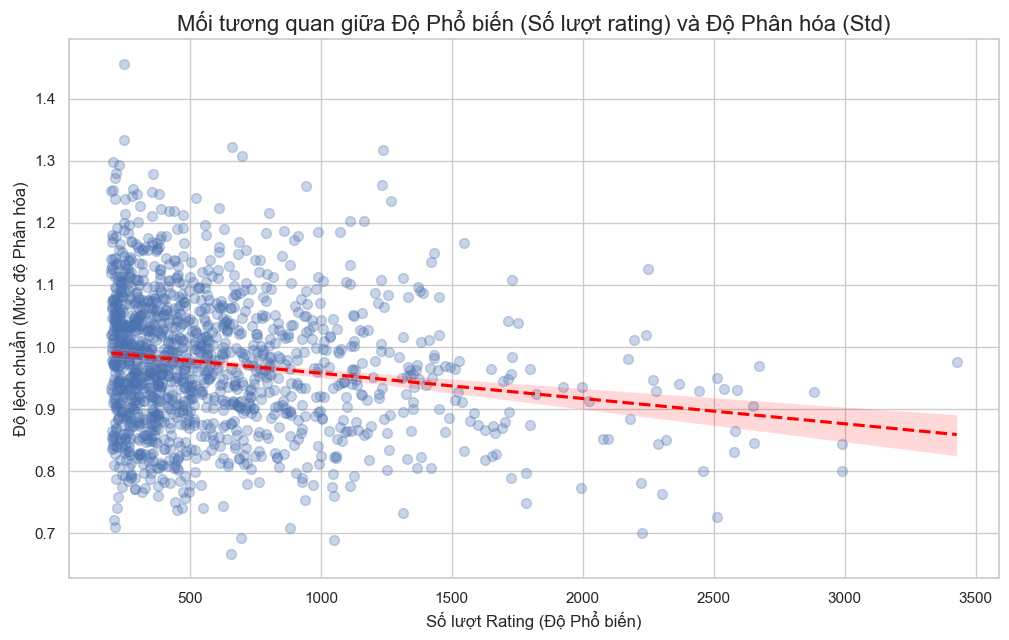

In [16]:
MIN_REVIEWS = 200
popular_movies_stats = movie_stats[movie_stats['rating_count'] >= MIN_REVIEWS]

plt.figure(figsize=(12, 7))

sns.regplot(
    x='rating_count',
    y='rating_std',
    data=popular_movies_stats,
    scatter_kws={'alpha': 0.3, 's': 50},     
    line_kws={'color': 'red', 'linestyle': '--'} 
)

plt.title('Mối tương quan giữa Độ Phổ biến (Số lượt rating) và Độ Phân hóa (Std)', fontsize=16)
plt.xlabel('Số lượt Rating (Độ Phổ biến)', fontsize=12)
plt.ylabel('Độ lệch chuẩn (Mức độ Phân hóa)', fontsize=12)

correlation = popular_movies_stats['rating_count'].corr(popular_movies_stats['rating_std'])
plt.show()


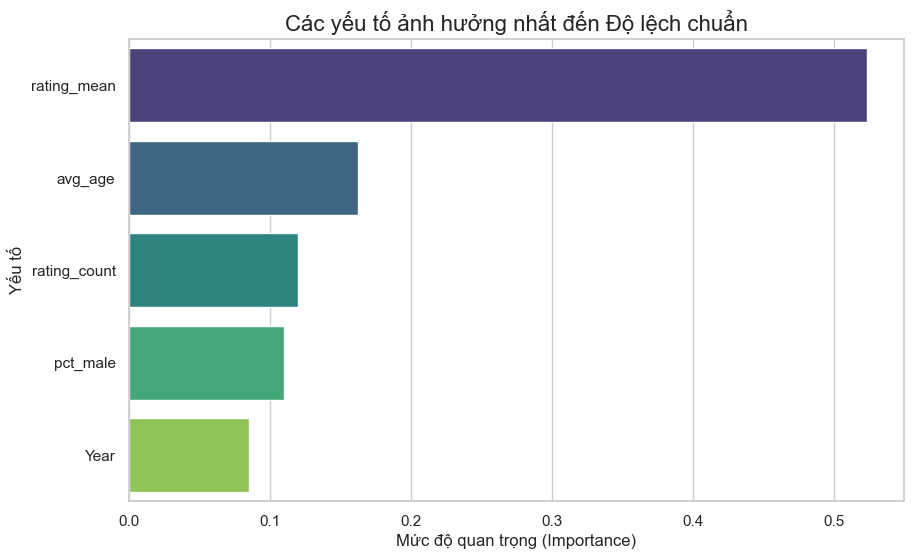

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
features = ['rating_count', 'rating_mean', 'Year', 'avg_age', 'pct_male']
target = 'rating_std'

X = popular_analysis_df[features]
y = popular_analysis_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

importances = model.feature_importances_
feature_importance_df = pd.Series(importances, index=features).sort_values(ascending=False)

# Vẽ biểu đồ tầm quan trọng
plt.figure(figsize=(10, 6))
sns.barplot(
    x=feature_importance_df.values,
    y=feature_importance_df.index,
    hue=feature_importance_df.index,  
    palette='viridis',
    legend=False                      
)
plt.title('Các yếu tố ảnh hưởng nhất đến Độ lệch chuẩn', fontsize=16)
plt.xlabel('Mức độ quan trọng (Importance)', fontsize=12)
plt.ylabel('Yếu tố', fontsize=12)
plt.show()

### “Mức độ phân tán rating (độ lệch chuẩn) có thể được sử dụng làm chỉ báo cho tính ‘controversial’ của nội dung trong hệ thống gợi ý phim không?” Chắc chắn là có. Đây là một trong những ứng dụng thực tế và giá trị nhất của chỉ số này.
### Ví dụ: Một bộ phim có độ lệch chuẩn (std) cao là một bộ phim có điểm rating bị phân cực mạnh. Nghĩa là, có rất nhiều người đánh giá 1-2 sao (ghét) và cũng có rất nhiều người đánh giá 4-5 sao (yêu thích). Rất ít người đánh giá ở mức 3 sao (trung bình).


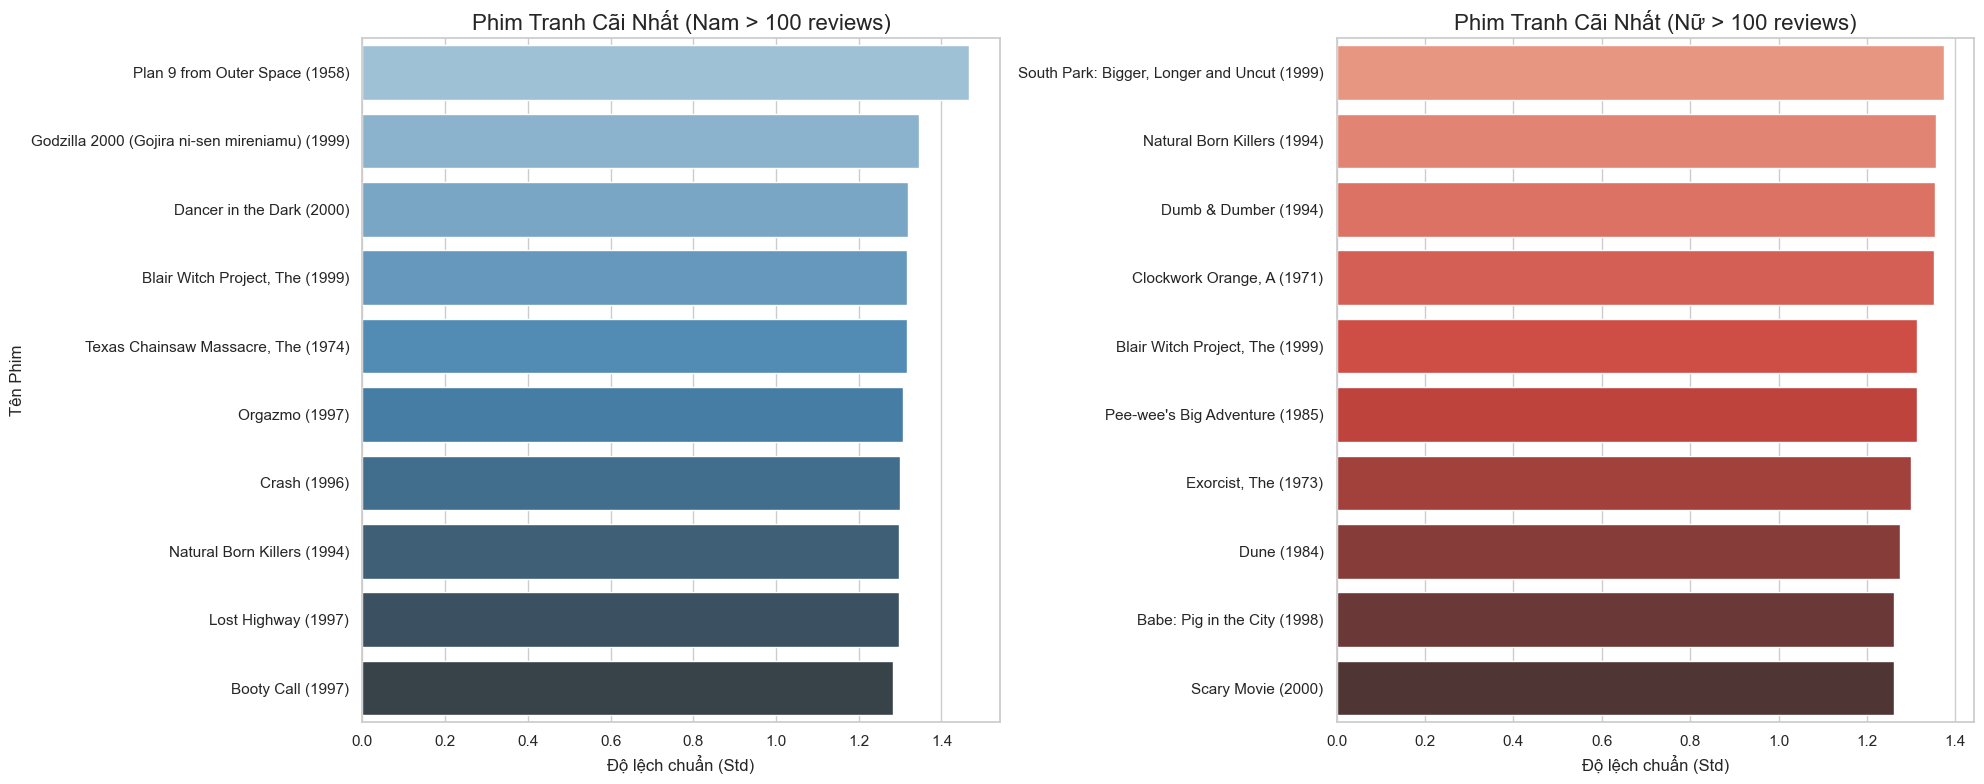

In [18]:
full_data = pd.merge(pd.merge(movies, ratings, on='MovieID'), users, on='UserID')

MIN_REVIEWS_GENDER = 100

# --- Bước 2: Phân tích cho Nam (Male) ---
male_data = full_data[full_data['Gender'] == 'M']
male_stats = male_data.groupby('Title').agg(
    rating_count=('Rating', 'count'),
    rating_std=('Rating', 'std')
)
controversial_male = male_stats[male_stats['rating_count'] >= MIN_REVIEWS_GENDER].sort_values('rating_std', ascending=False).head(10)

# --- Bước 3: Phân tích cho Nữ (Female) ---
female_data = full_data[full_data['Gender'] == 'F']
female_stats = female_data.groupby('Title').agg(
    rating_count=('Rating', 'count'),
    rating_std=('Rating', 'std')
)
# Lọc và sắp xếp
controversial_female = female_stats[female_stats['rating_count'] >= MIN_REVIEWS_GENDER].sort_values('rating_std', ascending=False).head(10)

# Vẽ 2 biểu đồ
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))  # 1 hàng, 2 cột

sns.barplot(
    x='rating_std', 
    y=controversial_male.index, 
    data=controversial_male, 
    hue=controversial_male.index,
    palette='Blues_d', 
    legend=False, 
    ax=ax1
)
ax1.set_title(f'Phim Tranh Cãi Nhất (Nam > {MIN_REVIEWS_GENDER} reviews)', fontsize=16)
ax1.set_xlabel('Độ lệch chuẩn (Std)', fontsize=12)
ax1.set_ylabel('Tên Phim', fontsize=12)

sns.barplot(
    x='rating_std', 
    y=controversial_female.index, 
    data=controversial_female, 
    hue=controversial_female.index,
    palette='Reds_d', 
    legend=False, 
    ax=ax2
)
ax2.set_title(f'Phim Tranh Cãi Nhất (Nữ > {MIN_REVIEWS_GENDER} reviews)', fontsize=16)
ax2.set_xlabel('Độ lệch chuẩn (Std)', fontsize=12)
ax2.set_ylabel('')

plt.tight_layout()
plt.show()


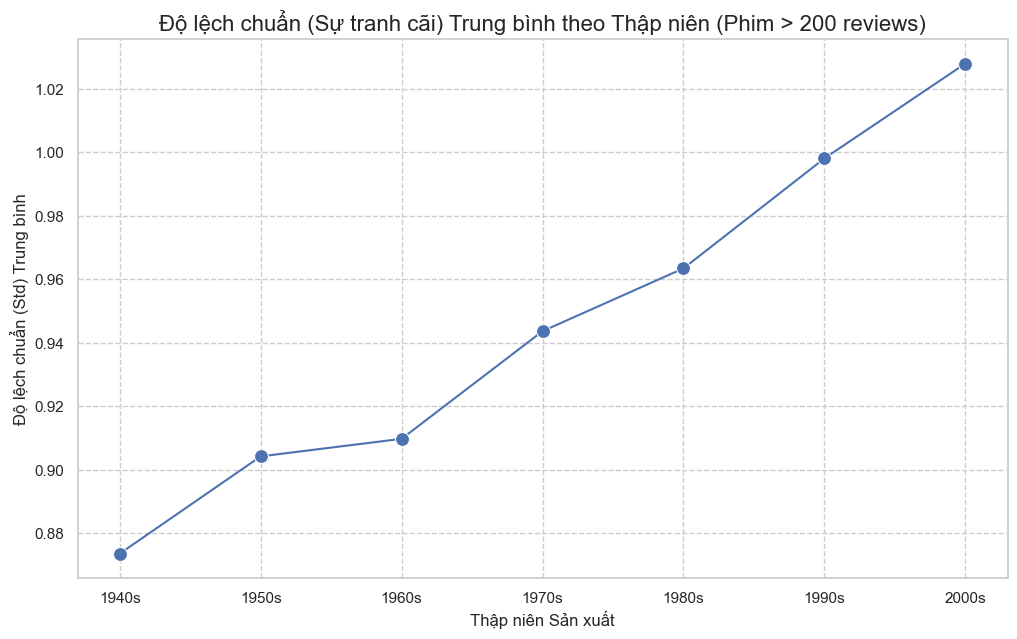

In [19]:
movie_ratings = pd.merge(movies, ratings, on='MovieID')
movie_stats = movie_ratings.groupby('Title').agg(
    rating_count=('Rating', 'count'),
    rating_mean=('Rating', 'mean'),
    rating_std=('Rating', 'std')
).reset_index()

# Tạo lại cột 'Year' cho 'movies'
movies_with_year = movies.copy()
movies_with_year['Year'] = movies_with_year['Title'].str.extract(r'\((\d{4})\)$')

# Gộp 'movie_stats' và 'Year'
stats_with_year = pd.merge(movie_stats, movies_with_year[['Title', 'Year']], on='Title')

# Lọc các phim phổ biến và loại bỏ các phim không có 'Year'
MIN_REVIEWS = 200 
stats_with_year = stats_with_year.dropna(subset=['Year'])
stats_with_year['Year'] = pd.to_numeric(stats_with_year['Year'])
popular_stats_with_year = stats_with_year[stats_with_year['rating_count'] >= MIN_REVIEWS]

popular_stats_with_year = popular_stats_with_year[popular_stats_with_year['Year'] >= 1940]
popular_stats_with_year['Decade'] = (popular_stats_with_year['Year'] // 10) * 10
popular_stats_with_year['Decade'] = popular_stats_with_year['Decade'].astype(str) + 's'

mean_std_by_decade = popular_stats_with_year.groupby('Decade')['rating_std'].mean().reset_index()

plt.figure(figsize=(12, 7))
sns.lineplot(
    x='Decade',
    y='rating_std',
    data=mean_std_by_decade,
    marker='o',
    markersize=10
)
plt.title(f'Độ lệch chuẩn (Sự tranh cãi) Trung bình theo Thập niên (Phim > {MIN_REVIEWS} reviews)', fontsize=16)
plt.xlabel('Thập niên Sản xuất', fontsize=12)
plt.ylabel('Độ lệch chuẩn (Std) Trung bình', fontsize=12)
plt.grid(True, linestyle='--')
plt.show()



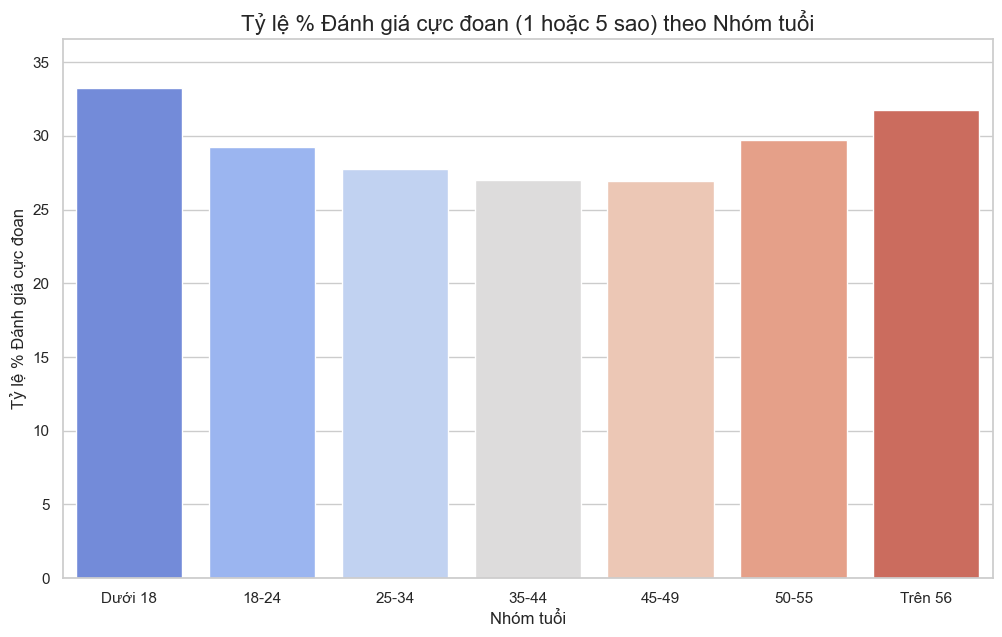

In [20]:
ratings_with_age = pd.merge(ratings, users, on='UserID')
age_map = {
    1: "Dưới 18", 18: "18-24", 25: "25-34",
    35: "35-44", 45: "45-49", 50: "50-55", 56: "Trên 56"
}
ratings_with_age['AgeGroup'] = ratings_with_age['Age'].map(age_map)

ratings_with_age['is_extreme'] = ratings_with_age['Rating'].isin([1, 5])

pct_extreme_by_age = ratings_with_age.groupby('AgeGroup')['is_extreme'].mean() * 100
pct_extreme_by_age = pct_extreme_by_age.reset_index()

age_order = ["Dưới 18", "18-24", "25-34", "35-44", "45-49", "50-55", "Trên 56"]
pct_extreme_by_age['AgeGroup'] = pd.Categorical(pct_extreme_by_age['AgeGroup'], categories=age_order, ordered=True)
pct_extreme_by_age = pct_extreme_by_age.sort_values('AgeGroup')

plt.figure(figsize=(12, 7))
sns.barplot(
    x='AgeGroup',
    y='is_extreme',
    hue='AgeGroup',
    data=pct_extreme_by_age,
    palette='coolwarm',
    legend=False
)
plt.title('Tỷ lệ % Đánh giá cực đoan (1 hoặc 5 sao) theo Nhóm tuổi', fontsize=16)
plt.xlabel('Nhóm tuổi', fontsize=12)
plt.ylabel('Tỷ lệ % Đánh giá cực đoan', fontsize=12)
plt.ylim(0, pct_extreme_by_age['is_extreme'].max() * 1.1) 
plt.show()

“Độ lệch chuẩn cao trong rating có thể phản ánh phân cực cảm xúc (emotional polarization) trong khán giả không?”
-Có. Đây chính là định nghĩa chính xác nhất của "phân cực cảm xúc" được thể hiện qua dữ liệu.
Lý do: Độ lệch chuẩn (standard deviation - std) cao chỉ xuất hiện khi có một số lượng đáng kể các đánh giá nằm ở cả hai thái cực của thang đo (ví dụ: rất nhiều điểm 1 sao và rất nhiều điểm 5 sao).
Ý nghĩa:
Điểm 1 (Ghét): Khán giả cảm thấy bộ phim này xúc phạm, nhàm chán, hoặc đi ngược lại giá trị đạo đức của họ.
Điểm 5 (Yêu): Khán giả cảm thấy bộ phim này là một kiệt tác, sâu sắc, hoặc chạm đến cảm xúc mạnh mẽ của họ.
Rất ít điểm 3 (Trung bình): Hầu như không ai xem xong bộ phim và cảm thấy "cũng bình thường".

+ “Có thể tận dụng các phim có độ phân tán rating cao để thiết kế thuật toán gợi ý theo phong cách ‘khám phá’ (serendipity recommendation) không?”
-Có, đây là một ứng dụng tuyệt vời. Các phim có độ phân tán (std) cao là những "món quà bất ngờ" hoặc "thảm họa" đang chờ được khám phá.
"Serendipity" (Khám phá tình cờ): Là thuật ngữ chỉ việc gợi ý cho người dùng một thứ gì đó mà họ sẽ rất thích, nhưng họ không bao giờ tự tìm kiếm hoặc không hề biết là mình sẽ thích. Nó ngược lại với gợi ý "an toàn" (ví dụ: bạn thích Star Wars, chúng tôi gợi ý The Empire Strikes Back).

Tại sao phim std cao lại phù hợp:
+ Rủi ro cao, Phần thưởng lớn: Các thuật toán thông thường (dựa trên trung bình) sẽ tránh gợi ý các phim này, vì chúng có 50% khả năng khiến người dùng ghét (rate 1 sao).
+ Tạo cơ hội "Wow!": Bằng cách xác định một nhóm nhỏ người dùng (ví dụ: những người thích mạo hiểm, hoặc đã từng thích các phim std cao khác), hệ thống có thể "đánh cược" gợi ý bộ phim này.
+ Cơ chế: Nếu người dùng ghét nó, họ sẽ bỏ qua. Nhưng nếu họ (tình cờ) nằm trong nhóm 50% "yêu thích" nó, họ sẽ có một trải nghiệm "khám phá" tuyệt vời. Họ đã tìm thấy một "viên ngọc ẩn" (đối với họ) mà không hệ thống nào khác dám gợi ý.

- “Liệu phim ‘gây chia rẽ’ có khả năng lan tỏa truyền thông (viral) cao hơn phim ‘được yêu thích đồng thuận’ không?”
Câu trả lời: Có khả năng, và xu hướng truyền thông hiện đại cho thấy là ĐÚNG.

Động lực của "Viral": Sự lan tỏa (viral) được thúc đẩy bởi "sự bàn tán" (discourse/buzz). Sự bàn tán mạnh nhất đến từ sự bất đồng (disagreement).

So sánh hai trường hợp:
- Phim đồng thuận (std thấp): Ví dụ, một bộ phim Pixar được 99% khán giả đồng ý là "rất hay" (4-5 sao). Cuộc hội thoại sẽ là: "Phim hay quá!" - "Ừ, hay thật." -> Cuộc hội thoại kết thúc.
- Phim chia rẽ (std cao): Ví dụ, phim Joker (2019) hoặc The Last Jedi. Một nửa nói "Kiệt tác, 10/10!", nửa còn lại nói "Rác rưởi, 1/10!".

Kết quả: Sự chia rẽ này tạo ra hàng ngàn bài đăng blog, video YouTube, các cuộc tranh cãi nảy lửa trên Facebook/Twitter. Mọi người cảm thấy bức xúc phải lên tiếng bảo vệ quan điểm của mình (dù là yêu hay ghét). Chính sự tranh cãi này liên tục đẩy bộ phim vào "trending" và khiến những người chưa xem cũng tò mò phải đi xem.

# Kết thúc